# Breast Cancer ML Research

First, let's import important libaries and the dataset we will be using, a binary classification breast cancer dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve

This dataset, which we will name data, includes information about whether or not a patient has breast cancer, as well as various other factors. Our goal is to train our model to predict if someone has breast cancer based on these factors.

In [2]:
data = load_breast_cancer()
x = data.data
y = data.target

Now, we will manipulate our dataset to make sure it can fit well into our models.

In [3]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In our dataset, the right-most column, "target", shows the binary classification of this dataset. The column holds a value for each row indicating if a patient has breast cancer or not. If target = 0, then the tumor is benign. If target = 1, then the tumor is cancerous.

In [4]:
df = pd.DataFrame(data=np.c_[x, y], columns=np.append(data.feature_names, ["target"]))
display(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Next, let's split our data into testing and training data. As we want to use some of our data to train the model, we will save some of the rest of our data for testing. This will allow us to see how our models perform with the remaining, unseen data.

In [5]:
x_train , x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 42)

The evaluate function will check how good each model is performing, by printing a Classification Matrix, Classification Report, and AUC score.

In [6]:
def evaluate(y_true, y_pred, y_prob, model_name):
  print("Model:", model_name)

  print("\n")
  print("Confusion Matrix:")
  print(confusion_matrix(y_true, y_pred))

  print("Classification Report:")
  print(classification_report(y_true, y_pred))

  if y_prob is not None:
    print("AUC Score:", roc_auc_score(y_true, y_prob))
  print("\n")

Now, let's create a logistic regression machine learning model.

In [7]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter = 1000, solver = 'saga') # lr_model is a variable ? LogisticRegression is a class ? this is a constructor
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
y_prob_lr = lr_model.predict_proba(x_test)[:,1]

evaluate(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")

Model: Logistic Regression


Confusion Matrix:
[[ 62   1]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

AUC Score: 0.9980893592004703




We see from calling the evaluate function that our Confusion Matrix yields many true positives and true falses, showing that our model is doing pretty well.

Our AUC score is also very close to 1. This is likely because we are using a dataset from Scikit-learn, which means it is very clean and is easier to get a very high AUC score from.

The second ML model we will create uses the K-Nearest Neighbors algorithm.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
y_prob_knn = knn_model.predict_proba(x_test)[:,1]

evaluate(y_test, y_pred_knn, y_prob_knn, "K-Nearest Neighbors")

Model: K-Nearest Neighbors


Confusion Matrix:
[[ 59   4]
 [  3 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

AUC Score: 0.9776601998824221




The third ML model we will create uses the Support Vector Machines algorithm. This is another algorithm that sorts data in bins (like Logistic Regression), however it categorizes data by splitting it with a line. Therefore, this algorithm works best for very clean data.

In [9]:
from sklearn.svm import SVC

svm_model = SVC(probability = True)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
y_prob_svm = svm_model.predict_proba(x_test)[:,1]

evaluate(y_test, y_pred_svm, y_prob_svm, "Support Vector Machine")

Model: Support Vector Machine


Confusion Matrix:
[[ 61   2]
 [  3 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

AUC Score: 0.9964726631393297




The fourth ML model we will create employs a decision tree.

In [10]:
# would go column by column, determine if some metric is larger than some value, assign 1 or 0 (yes or no) to it, and move down accordingly
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
y_prob_dt = dt_model.predict_proba(x_test)[:,1]

evaluate(y_test, y_pred_dt, y_prob_dt, "Decision Tree")

Model: Decision Tree


Confusion Matrix:
[[59  4]
 [10 98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.89        63
           1       0.96      0.91      0.93       108

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171

AUC Score: 0.921957671957672




The fifth ML model uses a random forest algorithm.

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
y_prob_rf = rf_model.predict_proba(x_test)[:,1]

evaluate(y_test, y_pred_rf, y_prob_rf, "Random Forest")

Model: Random Forest


Confusion Matrix:
[[ 59   4]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

AUC Score: 0.9965461493239272




The sixth ML model utilizes Gradient boosting.

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)
y_prob_gb = gb_model.predict_proba(x_test)[:,1]

evaluate(y_test, y_pred_gb, y_prob_gb, "Gradient Boosting")

Model: Gradient Boosting


Confusion Matrix:
[[ 59   4]
 [  3 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

AUC Score: 0.9945620223398002




The seventh ML model requires the Naive Bayes algorithm, based on Bayes thereom.

In [13]:
from sklearn.naive_bayes import GaussianNB

gb_model = GaussianNB()
gb_model.fit(x_train, y_train)
y_preb_gb = gb_model.predict(x_test)
y_prob_gb = gb_model.predict_proba(x_test)[:,1]

evaluate(y_test, y_preb_gb, y_prob_gb, "Naive Bayes")

Model: Naive Bayes


Confusion Matrix:
[[ 57   6]
 [  5 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

AUC Score: 0.9926513815402704




The eighth ML model uses neural networks.

In [14]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(max_iter = 1000)
nn_model.fit(x_train, y_train)
y_preb_nn = nn_model.predict(x_test)
y_prob_nn = nn_model.predict_proba(x_test)[:,1]

evaluate(y_test, y_preb_nn, y_prob_nn, "Neural Network (MLP Classifier)")

Model: Neural Network (MLP Classifier)


Confusion Matrix:
[[ 61   2]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

AUC Score: 0.9966196355085244




The ninth ML model uses the AdaBoost technique.

In [15]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost
ab_model = AdaBoostClassifier()
ab_model.fit(x_train, y_train)
y_pred_ab = ab_model.predict(x_test)
y_prob_ab = ab_model.predict_proba(x_test)[:, 1]

# Evaluate AdaBoost
evaluate(y_test, y_pred_ab, y_prob_ab, "AdaBoost")

Model: AdaBoost


Confusion Matrix:
[[ 61   2]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

AUC Score: 0.9961787184009406




Our tenth and last ML model uses XGBoost (Extreme Gradient Boost).

In [16]:
import xgboost as xgb

# Train XGBoost
xg_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xg_model.fit(x_train, y_train)
y_pred_xg = xg_model.predict(x_test)
y_prob_xg = xg_model.predict_proba(x_test)[:, 1]

# Evaluate XGBoost
evaluate(y_test, y_pred_xg, y_prob_xg, "XGBoost")

Model: XGBoost


Confusion Matrix:
[[ 61   2]
 [  3 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

AUC Score: 0.9944150499706055




Now, let's try to visualize the performance of these models.

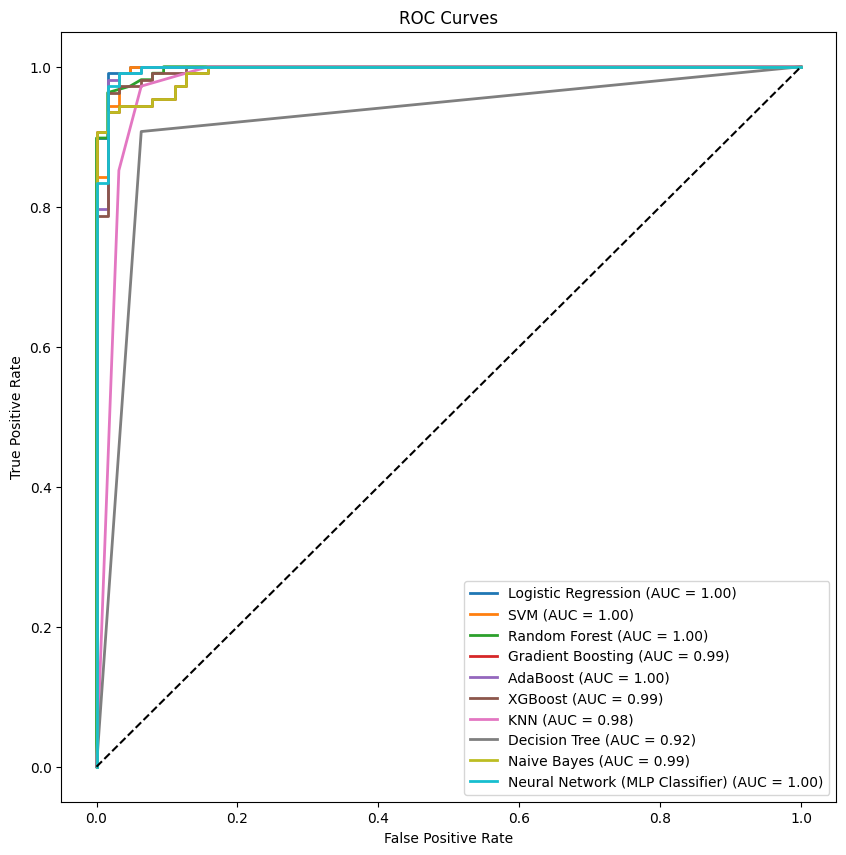

In [18]:
plt.figure(figsize = (10,10))

def plot_roc(model, X_test, y_test, label):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

plot_roc(lr_model, x_test, y_test, 'Logistic Regression')
plot_roc(svm_model, x_test, y_test, 'SVM')
plot_roc(rf_model, x_test, y_test, 'Random Forest')
plot_roc(gb_model, x_test, y_test, 'Gradient Boosting')
plot_roc(ab_model, x_test, y_test, 'AdaBoost')
plot_roc(xg_model, x_test, y_test, 'XGBoost')
plot_roc(knn_model, x_test, y_test, 'KNN')
plot_roc(dt_model, x_test, y_test, 'Decision Tree')
plot_roc(gb_model, x_test, y_test, 'Naive Bayes')
plot_roc(nn_model, x_test, y_test, 'Neural Network (MLP Classifier)')

# Plot the diagonal line (random guessing)
plt.plot([0, 1], [0, 1], 'k--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

# Add legends for each model
plt.legend(loc="lower right")

plt.show()

These are the ROC curves for our models. As they are further from the diagonal line, we see that our models are doing pretty well - which we expected from our very high AUC scores!

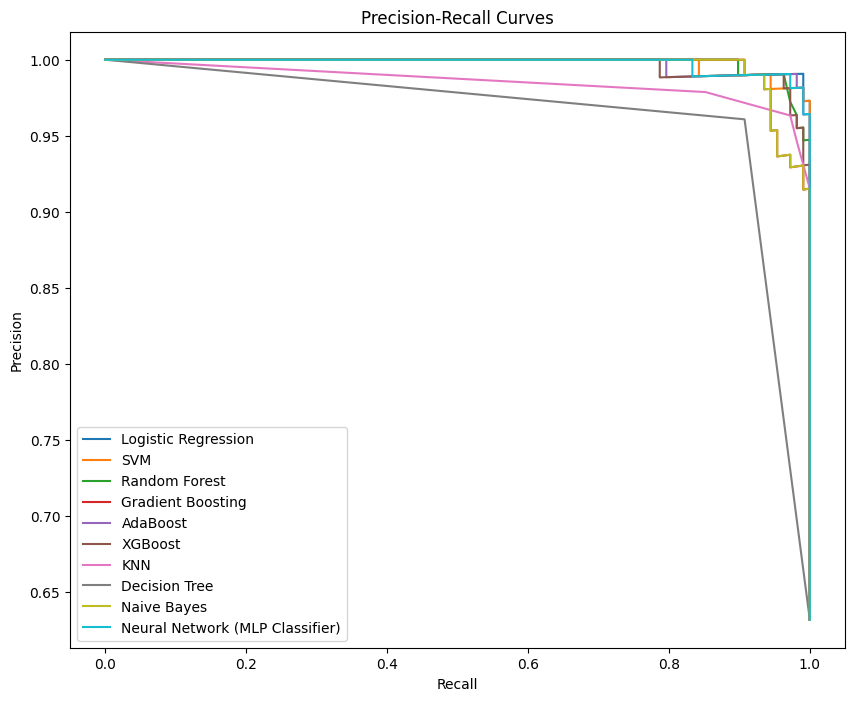

In [19]:
def plot_precision_recall_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob)

        plt.plot(recall, precision, label=f'{model_name}')

# Plotting Precision-Recall Curves for all applicable models

plt.figure(figsize=(10, 8))
plot_precision_recall_curve(lr_model, x_test, y_test, 'Logistic Regression')
plot_precision_recall_curve(svm_model, x_test, y_test, 'SVM')
plot_precision_recall_curve(rf_model, x_test, y_test, 'Random Forest')
plot_precision_recall_curve(gb_model, x_test, y_test, 'Gradient Boosting')
plot_precision_recall_curve(ab_model, x_test, y_test, 'AdaBoost')
plot_precision_recall_curve(xg_model, x_test, y_test, 'XGBoost')
plot_precision_recall_curve(knn_model, x_test, y_test, 'KNN')
plot_precision_recall_curve(dt_model, x_test, y_test, 'Decision Tree')
plot_precision_recall_curve(gb_model, x_test, y_test, 'Naive Bayes')
plot_precision_recall_curve(nn_model, x_test, y_test, 'Neural Network (MLP Classifier)')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.show()

These are our Precision-Recall Curves.